In [10]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

def pca_95(xTrain, xTest):
    pca = sklearnPCA(.95)
    pca.fit(xTrain)
    xTrain_pca = pca.transform(xTrain)
    xTest_pca = pca.transform(xTest)
    return xTrain_pca, xTest_pca

def PCA_xgboost(xTrain, yTrain, xTest, yTest):
    yTrain = np.ravel(yTrain)
    params = {'n_estimators': 100,
              'max_depth': 5,
              'min_samples_leaf': 5,
              'learning_rate': 0.1,
              'loss': 'ls'}
    reg = GradientBoostingRegressor(**params)
    reg.fit(xTrain, yTrain)
    yHat = reg.predict(xTest)
    RMSE(yTest, yHat)

    test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
    for i, yhat in enumerate(reg.staged_predict(xTest)):
        test_score[i] = reg.loss_(yTest, yhat)

    fig = plt.figure(figsize=(6, 6))
    plt.subplot(1, 1, 1)
    plt.title('Deviance')
    plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
             label='Training Set Deviance')
    plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
             label='Test Set Deviance')
    plt.legend(loc='upper right')
    plt.xlabel('Boosting Iterations')
    plt.ylabel('Deviance')
    fig.tight_layout()
    plt.show()


def RMSE(ytest, yhat):
    """
    :param ytest: true y values in the test set
    :param yhat: predicted y values
    :return:
    """
    rmse = np.sqrt(mean_squared_error(ytest, yhat))
    rsquare = r2_score(ytest, yhat)
    print("RMSE: %f" % (rmse))
    print("R-square: %f" % (rsquare))


def Param_search(xTrain, yTrain, xTest, yTest):
    clf = GridSearchCV(
        estimator=GradientBoostingRegressor(),
        param_grid=[{'max_depth': range(5, 21, 5),
                     'learning_rate': [0.01, 0.05, 0.1, 0.5],
                     'min_samples_leaf': range(5, 21, 5)}], cv=5, scoring='r2')
    clf.fit(xTrain, yTrain)
    yHat = clf.predict(xTest)

    means = clf.cv_results_['mean_test_score']
    for mean, params in zip(means, clf.cv_results_['params']):
        print("%0.3f for %r" % (mean, params))
    print()
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)


def file_to_numpy(filename):
    """
    Read an input file and convert it to numpy
    """
    df = pd.read_csv(filename)
    return df.to_numpy()

RMSE: 9.852806
R-square: 0.439262


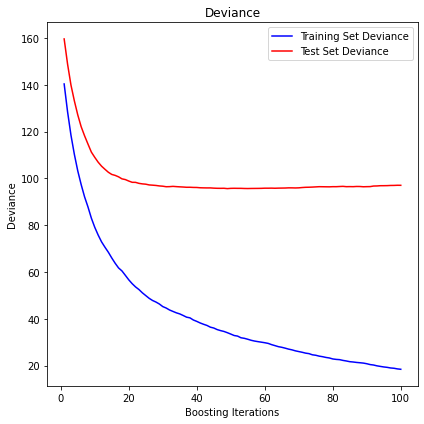

In [11]:
"""
Main file to run from the command line.
"""
#xTrain = pd.read_csv('xTrain.csv')
#yTrain = pd.read_csv('yTrain.csv')
file = pd.read_csv("train.csv")
y = file.iloc[:, 1:2]
x = pd.read_csv("x_transformed.csv")
x = x.iloc[:, 1:]

xHatNames = x.head(0)
xHatNames = xHatNames.T
x = x.to_numpy()
y = y.to_numpy()
y = y.T[0]
# print(y)
# print(len(x[0]))
# print(xHatNames)

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=40)
xTrain, xTest = pca_95(xTrain, xTest)

PCA_xgboost(xTrain, yTrain, xTest, yTest)
#Param_search(xTrain, yTrain, xTest, yTest)